### What we often do in this use-case
     Life- Cycle of Data Science Project :
        a) Data collection
        b) Perform Data Cleaning / Data Preparation / Data Pre-processing
        c) Data visuaslisation(EDA)
        d) Perform feature engineering
            I)  Feature encoding
            II) checking outliers & impute it..
            III)Feature selection or feature importance
            
        e) build machine leaning model & dump it..
        f) Automate ML Pipeline
        g) hypertune ml model..along with cross validation

    

## 1.. Lets read data !

In [1]:
## import necessary packages !

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# train_data = pd.read_excel("Data_Train.xlsx", parse_dates=["Date_of_Journey", "Dep_Time", "Arrival_Time"])
train_data = pd.read_excel("Data_Train.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## 2.. Lets deal with missing values ..

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data.dropna(inplace=True)

## 3.. Lets Perform Data Pre-process & extract Derived attributes from "Date_of_Journey"
        lets extract derived attributes from "Date_of_Journey" & fetch day , month , year !

In [6]:
data = train_data.copy()

In [7]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)

In [8]:
data["Journey_day"] = data['Date_of_Journey'].dt.day
data["Journey_month"] = data['Date_of_Journey'].dt.month
data["Journey_year"] = data['Date_of_Journey'].dt.year

data.drop("Date_of_Journey", axis=1, inplace=True)

## 4.. Lets try to clean Dep_Time & Arrival_Time & then extract Derived attributes ..

In [9]:
def extract_hour_min(df, cols):
    for col in cols:
        df[col+"_hour"] = df[col].dt.hour
        df[col+"_minute"] = df[col].dt.minute

In [10]:
extract_hour_min(data , ["Dep_Time", "Arrival_Time"])
data.drop(["Dep_Time", "Arrival_Time"], axis=1, inplace=True)

## 5.. lets analyse when will most of the flights take-off..


In [11]:
# Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

import plotly
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
from cufflinks.offline import go_offline
import cufflinks as cf


def flight_dep_time(x):
    if (x > 4) and (x <= 8):
        return "Early Morning"

    elif (x > 8) and (x <= 12):
        return "Morning"

    elif (x > 12) and (x <= 16):
        return "Noon"

    elif (x > 16) and (x <= 20):
        return "Evening"

    elif (x > 20) and (x <= 24):
        return "Night"

    else:
        return "late night"
# how to use Plotly interactive plots directly with Pandas dataframes, First u need below set-up !


init_notebook_mode(connected=True)
cf.go_offline()

# plot is a command of Matplotlib which is more old-school. It creates static charts
# iplot is an interactive plot. Plotly takes Python code and makes beautiful looking JavaScript plots.


data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")

## 6.. Pre-process Duration Feature & extract meaningful features from it..


In [12]:
# def preprocess_duration(x):
#     if 'h' not in x:
#         x = '0h' + ' ' + x
#     elif 'm' not in x:
#         x = x + ' ' +'0m'

#     return x

# data['Duration'] = data['Duration'].apply(preprocess_duration)

# data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split()[0][0:-1]))
# data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split()[1][0:-1]))

In [13]:
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

data["Duration"] = duration


def duration_hour(x):
    return x.split()[0][:-1]


def duration_minute(x):
    return x.split()[1][:-1]


data["Duration_hour"] = data["Duration"].apply(duration_hour)
data["Duration_minute"] = data["Duration"].apply(duration_minute)

data.drop("Duration", axis=1, inplace=True)

In [14]:
data["Duration_hour"] = data["Duration_hour"].astype(int)
data["Duration_minute"] = data["Duration_minute"].astype(int)

## 7.. Lets Analyse whether Duration impacts Price or not ?


In [15]:
data['Duration_total_mins'] = data.Duration_hour * 60 + data.Duration_minute

# data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval) # drop duration code should be uncommented

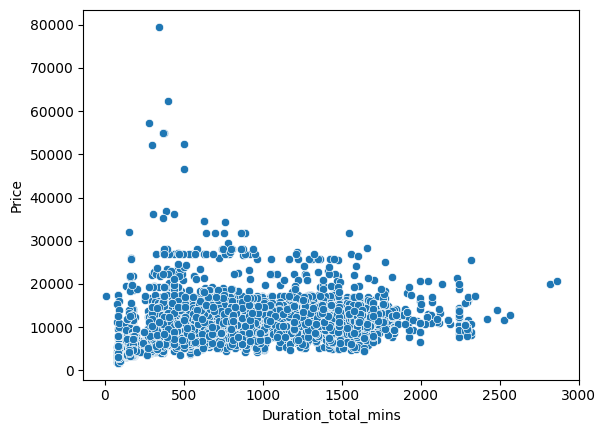

In [16]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , data=data);

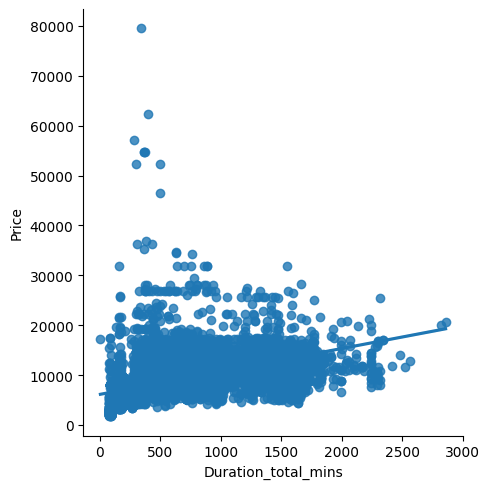

In [17]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data=data);

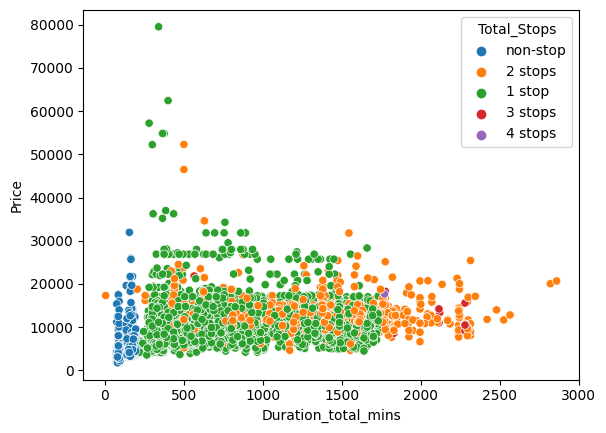

In [18]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data);

## 8.. on which route Jet Airways is extremely used?


In [19]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

## 9.. Applying one-hot Encoding on data..

#### Handling Categorical Data
    We are using 2 basic Encoding Techniques to convert Categorical data into some numerical format
    Nominal data --> data are not in any order --> OneHotEncoder is used in this case
    Ordinal data --> data are in order -->       LabelEncoder is used in this case
    
    But in real-world , it is not necessary that u have to always One-hot or label ,
    hence we will discuss more interesting approaches in upcoming sessions to do this !

In [20]:
cat_cols = [col for col in data.columns if data[col].dtype == "O"]
cat_cols

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [21]:
num_cols = [col for col in data.columns if data[col].dtype != "O"]
num_cols

['Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hour',
 'Duration_minute',
 'Duration_total_mins']

In [22]:
categorical = data[cat_cols]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [23]:
categorical["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

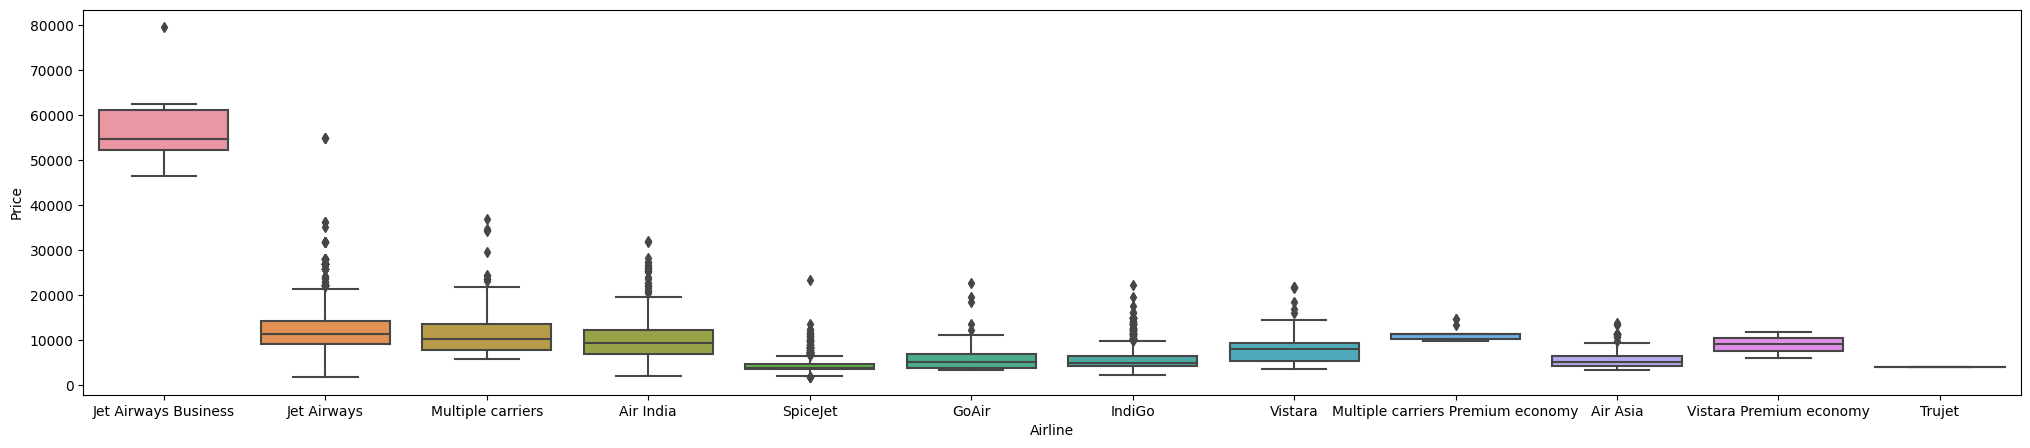

In [24]:
plt.figure(figsize=(25, 5))
sns.boxplot(x="Airline", y="Price", data=data.sort_values("Price", ascending=False))
plt.show()

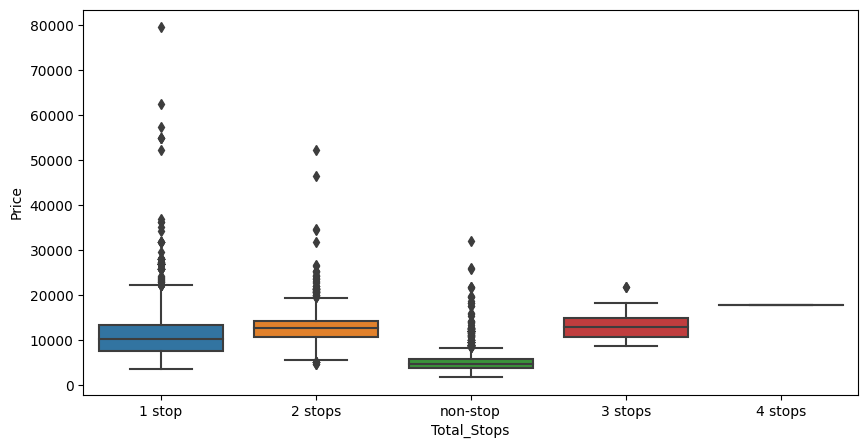

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Total_Stops", y="Price", data=data.sort_values("Price", ascending=False))
plt.show()

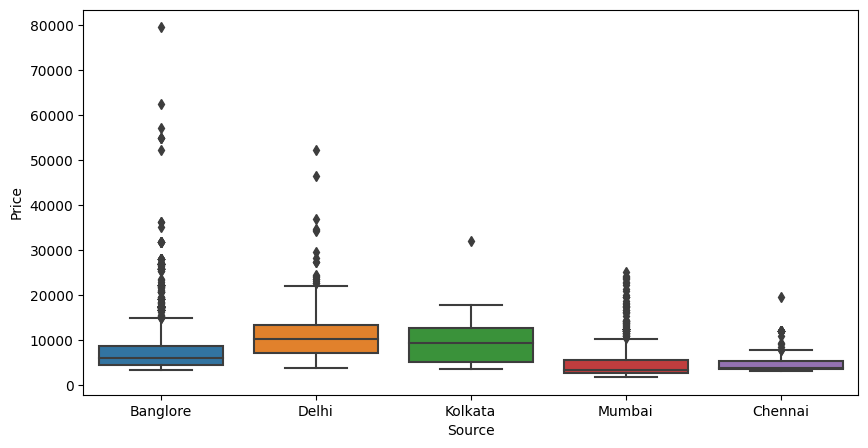

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Source", y="Price", data=data.sort_values("Price", ascending=False))
plt.show()

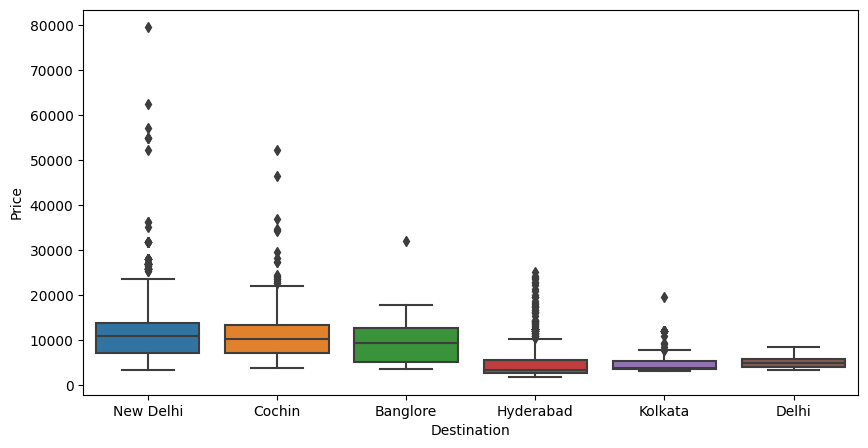

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Destination", y="Price", data=data.sort_values("Price", ascending=False))
plt.show()

In [28]:
categorical["Route_1"] = categorical["Route"].str.split(' → ').str[0]
categorical["Route_2"] = categorical["Route"].str.split(' → ').str[1]
categorical["Route_3"] = categorical["Route"].str.split(' → ').str[2]
categorical["Route_4"] = categorical["Route"].str.split(' → ').str[3]
categorical["Route_5"] = categorical["Route"].str.split(' → ').str[4]

categorical.drop("Route", axis=1, inplace=True)

In [29]:
categorical[categorical.columns[categorical.columns.str.contains('Route')]]

,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR,DEL,NaN,NaN,NaN
1,CCU,IXR,BBI,BLR,NaN
2,DEL,LKO,BOM,COK,NaN
3,CCU,NAG,BLR,NaN,NaN
4,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...
10678,CCU,BLR,NaN,NaN,NaN
10679,CCU,BLR,NaN,NaN,NaN
10680,BLR,DEL,NaN,NaN,NaN
10681,BLR,DEL,NaN,NaN,NaN


In [30]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [31]:
for i in ["Route_3", "Route_4", "Route_5"]:
    categorical[i].fillna("None", inplace=True)

In [32]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [33]:
for i in categorical.columns:
    print(f"{i} has {len(categorical[i].value_counts())} categories")

Airline has 12 categories
Source has 5 categories
Destination has 6 categories
Total_Stops has 5 categories
Additional_Info has 10 categories
Route_1 has 5 categories
Route_2 has 40 categories
Route_3 has 27 categories
Route_4 has 12 categories
Route_5 has 6 categories


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in list(categorical.columns[categorical.columns.str.contains('Route')]):
    categorical[i] = le.fit_transform(categorical[i])

In [35]:
categorical.drop("Additional_Info", axis=1, inplace=True)

## 10.. Lets Perform target guided encoding on Data
    ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality
    lets use Target Guided Mean Encoding in such case to get rid of curse of dimensionality..

In [36]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [37]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [38]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [39]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [40]:
data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)

In [41]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [42]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [43]:
data['Destination'] = data['Destination'].map(dict_dest)

In [44]:
source = data.groupby(['Source'])['Price'].mean().sort_values().index
source

Index(['Chennai', 'Mumbai', 'Banglore', 'Kolkata', 'Delhi'], dtype='object', name='Source')

In [45]:
dict_source = {val: idx for idx, val in enumerate(source)}
dict_source

{'Chennai': 0, 'Mumbai': 1, 'Banglore': 2, 'Kolkata': 3, 'Delhi': 4}

In [46]:
data["Source"] = data["Source"].map(dict_source)

In [47]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins
0,3,2,2,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,7,3,3,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,10,4,4,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,3,3,3,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325
4,3,2,2,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45,285


## 11.. Perform Label(Manual) Encoding on Data

In [48]:
total_stop_dict = {"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}
categorical["Total_Stops"] = categorical["Total_Stops"].map(total_stop_dict)

In [49]:
concat_with = pd.get_dummies(categorical[["Airline", "Source", "Destination"]], drop_first=True, dtype=int)
categorical.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)
data_train = pd.concat([categorical, concat_with, data[num_cols]], axis=1)

In [50]:
pd.set_option('display.max_columns', data_train.shape[1])
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins
0,0,0,10,21,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,2019,22,20,1,10,2,50,170
1,2,2,20,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,1,5,2019,5,50,13,15,7,25,445
2,2,3,27,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,9,6,2019,9,25,4,25,19,0,1140
3,1,2,29,3,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,12,5,2019,18,5,23,30,5,25,325
4,1,0,29,7,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,1,3,2019,16,50,21,35,4,45,285


## 12.. Lets Perform outlier detection !

In [51]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

### b.. How to deal with Outlier

In [52]:
def dist_box(df, col):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2, orient="h")
    plt.show()

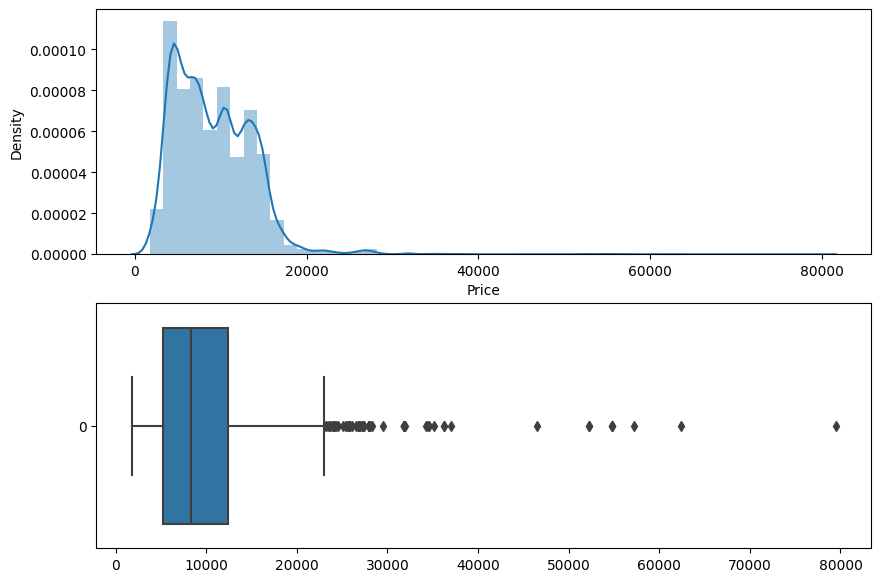

In [53]:
dist_box(data_train, "Price")

In [54]:
data_train["Price"] = np.where(data_train["Price"] >= 40000, data_train["Price"].median(), data_train["Price"])

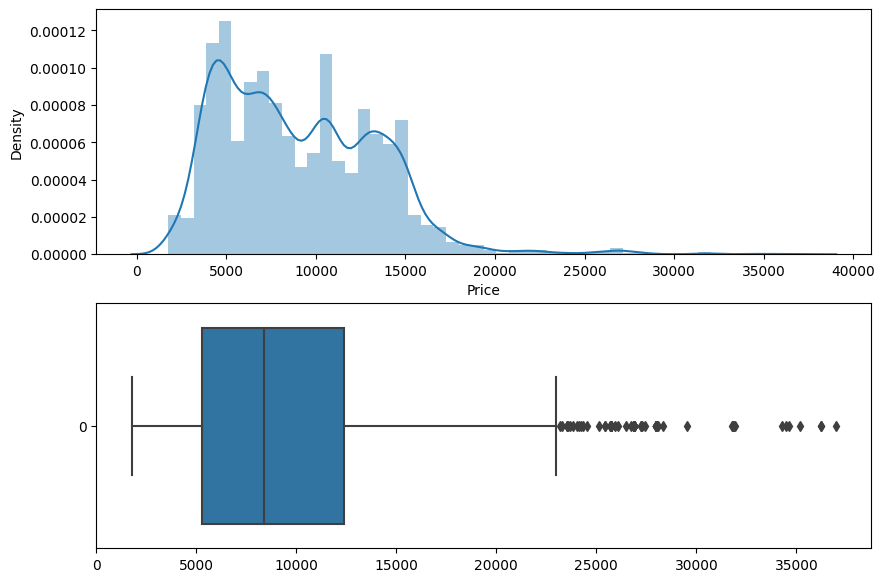

In [55]:
dist_box(data_train, "Price")

## 13.. Lets Perform feature selection

In [56]:
X = data_train.drop("Price", axis=1)
y = data_train["Price"]

In [57]:
from sklearn.feature_selection import mutual_info_classif

imp = pd.DataFrame(mutual_info_classif(X, y), index=X.columns)
imp.columns = ["importance"]
imp.sort_values(by="importance", ascending=False)
# 3dk 45sn 

,importance
Route_1,2.386962
Total_Stops,2.156900
Journey_month,1.724293
Route_2,1.693002
Destination_Cochin,1.547562
Source_Delhi,1.546515
Journey_year,1.419420
Route_5,1.265927
Route_4,1.254859
Arrival_Time_hour,1.182532


## 14.. Lets Build ML model

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

## 15.. How to automate ml pipeline & How to define your Evaluation metric..

'c:\\Users\\batu_\\OneDrive\\Belgeler\\GitHub\\Data-Science-Real-World-Projects-in-Python\\Project1-Flight Prediction'

In [79]:
import pickle
import os

def evaluate_metrics(model, dump=0):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    r2_Score = r2_score(y_test, model_pred)
    print("Training score:", model.score(X_train, y_train))
    print("Predictions are:", model_pred)
    print("R2 score is:", r2_Score)
    print("MAE:", mean_absolute_error(y_test, model_pred))
    print("MSE:", mean_squared_error(y_test, model_pred))
    print("RMSE:", mean_squared_error(y_test, model_pred, squared=False))

    sns.distplot(y_test - model_pred)

    if dump == 1:
        file = open(f"{os.getcwd()}\\{type(model).__name__}.pkl", "wb")
        pickle.dump(model, file)


In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

Training score: 0.9524044755361526
Predictions are: [16798.84   5314.54   8917.68  ...  3476.28   6358.408  6905.64 ]
R2 score is: 0.8340841312199037
MAE: 1114.401169503237
MSE: 3275939.1975902854
RMSE: 1809.955578899738


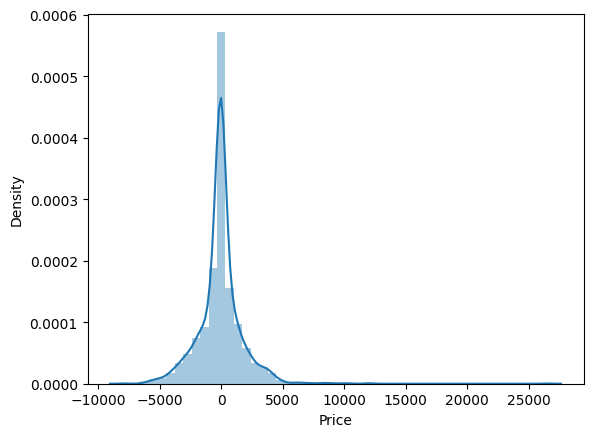

In [77]:
evaluate_metrics(RandomForestRegressor(), 1)

Training score: 0.9671466988052758
Predictions are: [16840.  4959.  9187. ...  3419.  5797.  6818.]
R2 score is: 0.7540180469233938
MAE: 1282.5272307500313
MSE: 4856810.429938433
RMSE: 2203.817240593791


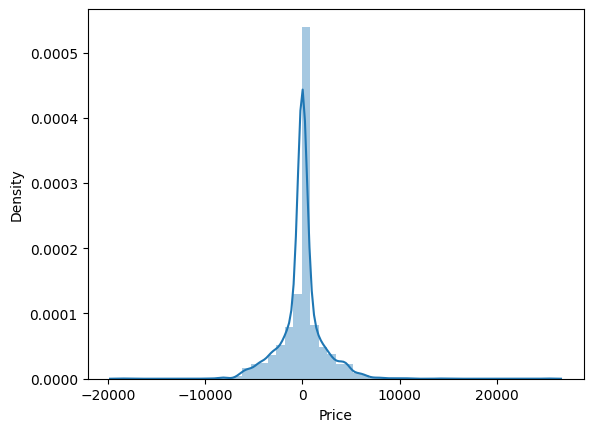

In [80]:
evaluate_metrics(DecisionTreeRegressor())

Training score: 0.6221018636856619
Predictions are: [12909.59755752  7761.6826905   9698.24460025 ...  2776.64030027
  9868.50177875  7670.71229861]
R2 score is: 0.6139395747541947
MAE: 1915.0027464800257
MSE: 7622601.0748697305
RMSE: 2760.905843173528


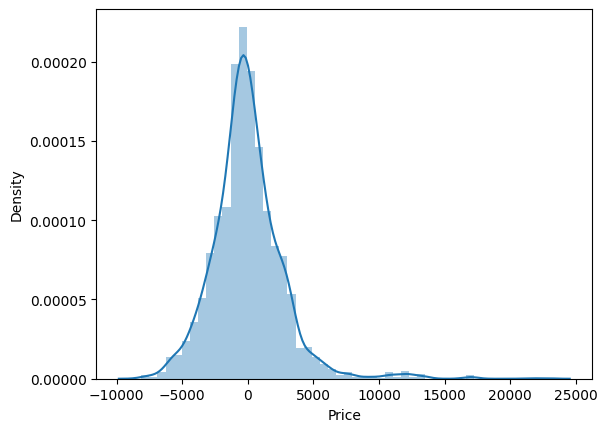

In [82]:
evaluate_metrics(LinearRegression())

Training score: 0.7433210000487097
Predictions are: [16315.   5158.2  8536.  ...  4125.6  7274.4  6958.4]
R2 score is: 0.5642883968455508
MAE: 1801.7674279296148
MSE: 8602942.745099213
RMSE: 2933.0773506846376


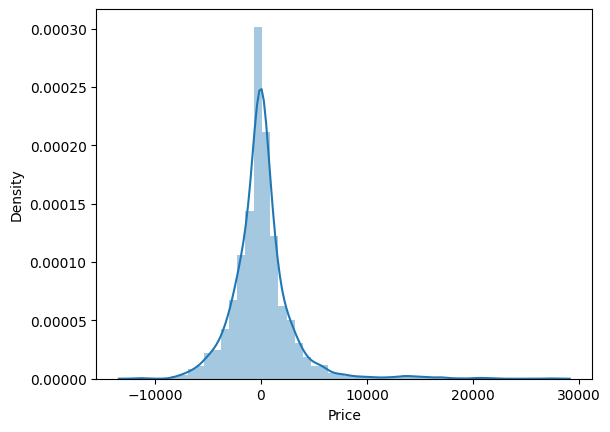

In [83]:
evaluate_metrics(KNeighborsRegressor())

## 16.. how to hypertune ml model

In [104]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
### initialise your estimator
reg_rf = RandomForestRegressor()

In [106]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]


In [107]:
# Create the random grid or hyper-parameter space

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

In [108]:
rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=5 , n_jobs=-1 , verbose=2)

In [115]:
rf_random.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [116]:
rf_random.best_params_

{'n_estimators': 980,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [117]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, max_features='auto', min_samples_split=5,
                      n_estimators=980)

In [118]:
rf_random.best_score_

0.8338771931330264

In [119]:
rf_cv = RandomForestRegressor(**rf_random.best_params_).fit(X_train , y_train)

Training score: 0.9243327833679996
Predictions are: [16819.46052592  5330.59343762  8699.15236112 ...  3884.30143802
  6808.33017861  6902.46344322]
R2 score is: 0.8543475308134811
MAE: 1078.846443406851
MSE: 2875846.8767465367
RMSE: 1695.832207721783


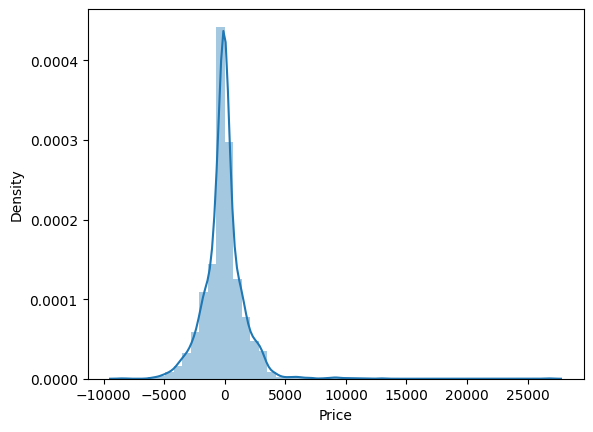

In [122]:
evaluate_metrics(rf_cv, 1)

In [125]:
model = open("RandomForestRegressor.pkl", "rb")
random_forest = pickle.load(model)

In [126]:
random_forest.predict(X_test)

array([16819.46052592,  5330.59343762,  8699.15236112, ...,
        3884.30143802,  6808.33017861,  6902.46344322])